# Conduct multi-agent traffic-aware planning on the discrete graph

In [2]:
import sys
sys.path.append('../')
from panav.env import NavigationEnv, Box2DRegion, box_2d_center
from panav.hybrid import HybridGraph
from panav.viz import draw_hybrid

import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

## Multi-tunnel environment

In [26]:


# 2D navigation environment
start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])


start_locs = np.array([[-5,1],[5,3],[-5,-1]])*1.5

goal_locs = np.array([[-5,-2.5],[-5,3],[5,-1]])*1.5



starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]

# O1 = Box2DRegion((-5.0,-0.5),(0.5,10))
# O2 = Box2DRegion((-0.0,5.0),(-10,-1.0))


O1 = Box2DRegion((-2.5,2.5),(0.5,10))
O2 = Box2DRegion((-2.5,2.5),(-3,-1.0))
O3 = Box2DRegion((-2.5,2.5),(-10.0,-4.0))

limits = [(-10.0,10.0),(-10.0,10.0)]

bloating_r = 0.5 

env = NavigationEnv(limits,[O1,O2,O3],starts,goals)


# Construct the hybrid graph representation of the environment

HG =  HybridGraph(env,bloating_r)


/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


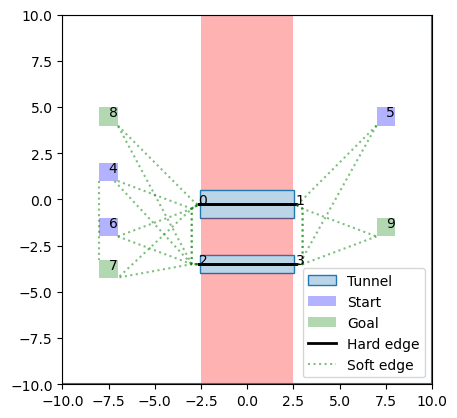

In [11]:
ax = plt.gca()
draw_hybrid(HG,ax,display_soft=True,display_node=True)
plt.show()    

In [14]:
HG.open_spaces

{0: {'nodes': {0, 2, 4, 6, 7, 8}, 'total_flow': 0},
 1: {'nodes': {1, 3, 5, 9}, 'total_flow': 0}}

In [28]:
import networkx as nx

In [34]:
## One-by-one planning
HG.__reset_traffic__()
for s,g in zip(HG.start_nodes,HG.goal_nodes):
    print(s,g)
    path = nx.shortest_path(HG,s,g,weight = "traffic_cost")
    print(path)
    # Update the edge flow along the path
    for i in range(len(path)-1):
        p,q = path[i],path[i+1]
        HG.edges[p,q]['flow'] += 1
    # Update graph traffic
    # HG.update_traffic()


            



4 7
[4, 7]
5 8
[5, 1, 0, 8]
6 9
[6, 0, 1, 9]


In [27]:
HG.edges[4,2]

{'type': 'soft',
 'continuous_path': array([[-7.18125, -3.     , -2.68125],
        [ 1.     , -3.5    , -3.5    ]]),
 'continuous_time': array([0.     , 6.36396, 6.81474]),
 'weight': 6.814741603685329,
 'flow': 0,
 'traffic_cost': 6.814741603685329}